In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import numpy as np
import matplotlib.pyplot as pyp

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense, Embedding, Reshape, Concatenate, Lambda, Conv1D, Multiply, Add, Bidirectional, MaxPooling1D, Activation, GaussianNoise, Layer, Conv2D, AveragePooling2D, Concatenate

2022-08-07 20:11:03.796867: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64/openmpi/lib/:/usr/local/cuda/lib64:/usr/local/lib:/usr/lib:/usr/local/cuda/extras/CUPTI/lib64:/usr/local/mpi/lib:/lib/:/home/ubuntu/src/cntk/bindings/python/cntk/libs:/usr/local/cuda/lib64:/usr/local/lib:/usr/lib:/usr/local/cuda/extras/CUPTI/lib64:/usr/local/mpi/lib::/home/ubuntu/miniconda3/lib/
2022-08-07 20:11:03.796867: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
def my_init(shape, dtype=None):
    L = np.ones(shape)
    # L[2,:,:,:] = 1
    return tf.cast(tf.convert_to_tensor(L),dtype = dtype)

In [69]:
A = np.ones(10).reshape(5,2).astype('float')

In [70]:
A = A.reshape(1,5,2,1)

In [71]:
L = Conv2D(1, (1,2), 1, padding = 'same', activation='linear', data_format = 'channels_last',use_bias = False, kernel_initializer = tf.keras.initializers.Ones()) #kernel_initializer = tf.keras.initializers.Ones())

In [72]:
A.squeeze()

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [73]:
L(A).numpy().squeeze()

array([[2., 1.],
       [2., 1.],
       [2., 1.],
       [2., 1.],
       [2., 1.]], dtype=float32)

In [62]:
L.weights[0].numpy().squeeze()

array([1., 1.], dtype=float32)

In [63]:
triarr = np.expand_dims(np.arange(10),-1)
zxf = np.expand_dims(np.stack([triarr for i in range(1,6)]),0).transpose([0,2,1,3]).astype('float')

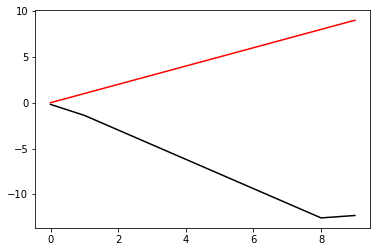

In [27]:
pyp.plot(L(zxf).numpy().squeeze()[:,0],'k')
pyp.plot(zxf[0,:,0,0],'r')

In [14]:
pyp.imshow(L(zxf).numpy().squeeze())

InvalidArgumentError: Exception encountered when calling layer "conv2d_1" (type Conv2D).

Value for attr 'T' of int64 is not in the list of allowed values: half, bfloat16, float, double, int32
	; NodeDef: {{node Conv2D}}; Op<name=Conv2D; signature=input:T, filter:T -> output:T; attr=T:type,allowed=[DT_HALF, DT_BFLOAT16, DT_FLOAT, DT_DOUBLE, DT_INT32]; attr=strides:list(int); attr=use_cudnn_on_gpu:bool,default=true; attr=padding:string,allowed=["SAME", "VALID", "EXPLICIT"]; attr=explicit_paddings:list(int),default=[]; attr=data_format:string,default="NHWC",allowed=["NHWC", "NCHW"]; attr=dilations:list(int),default=[1, 1, 1, 1]> [Op:Conv2D]

Call arguments received by layer "conv2d_1" (type Conv2D):
  • inputs=tf.Tensor(shape=(1, 10, 5, 1), dtype=int64)

In [42]:
L.weights[0].shape

TensorShape([3, 2, 1, 1])

In [43]:
A.squeeze()

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [10., 11., 12., 13., 14., 15., 16., 17., 18., 19.],
       [20., 21., 22., 23., 24., 25., 26., 27., 28., 29.],
       [30., 31., 32., 33., 34., 35., 36., 37., 38., 39.],
       [40., 41., 42., 43., 44., 45., 46., 47., 48., 49.]])

In [44]:
L(A).numpy().squeeze()

array([[ 22.,  26.,  30.,  34.,  38.,  42.,  46.,  50.,  54.,  28.],
       [ 63.,  69.,  75.,  81.,  87.,  93.,  99., 105., 111.,  57.],
       [123., 129., 135., 141., 147., 153., 159., 165., 171.,  87.],
       [183., 189., 195., 201., 207., 213., 219., 225., 231., 117.],
       [142., 146., 150., 154., 158., 162., 166., 170., 174.,  88.]],
      dtype=float32)

In [9]:
import scipy.fftpack as ftp
import numpy as np
import matplotlib.pyplot as pyp

In [62]:
np.concatenate((a,np.flip(a)))

array([0, 1, 2, 3, 3, 2, 1, 0])

In [63]:
b = np.pad(a,(0,a.shape[0]),mode = 'constant',constant_values=(0, 0))
# b = np.concatenate((a,np.flip(a)))

In [93]:
a = np.arange(960)
b = np.pad(a,(0,a.shape[0]),mode = 'constant',constant_values=(0, 0))
actual_type4dct = ftp.dct(a,type = 4,norm = None)
dct4_from_dct2 = ftp.dct(b,type = 2,norm = None)[1::2]

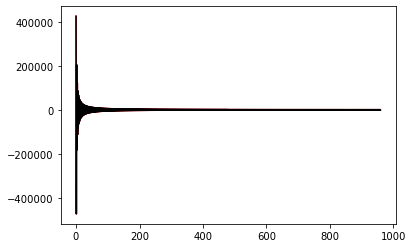

In [94]:
pyp.plot(actual_type4dct,'r')
pyp.plot(dct4_from_dct2,'k')

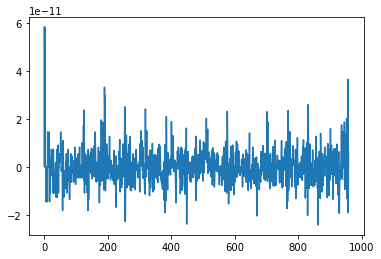

In [95]:
pyp.plot(actual_type4dct - dct4_from_dct2)

In [69]:
actual_type4dct

array([12.        , -6.30864406,  0.        , -0.44834153])

In [60]:
dct4_from_dct2 = ftp.dct(b,type = 4,norm = None)

In [54]:
dct4_from_dct2.shape

(100,)

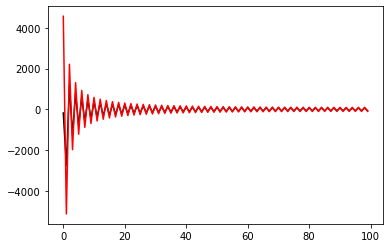

In [55]:
pyp.plot(dct4_from_dct2,'k')
pyp.plot(actual_type4dct,'r')

In [20]:
dct4_from_dct2

array([ -177.52641062, -2753.57295208,  1171.97210542, -1237.29249356,
         790.65917475,  -797.9566138 ,   589.02948171,  -589.23223721,
         468.46962203,  -467.41191776,   388.85376193,  -387.6449413 ,
         332.52373454,  -331.41183944,   290.64459239,  -289.67525394,
         258.33354063,  -257.50028274,   232.6796472 ,  -231.96402127,
         211.84214154,  -211.2251078 ,   194.60095896,  -194.06589271,
         180.11586991,  -179.64901781,   167.78954775,  -167.37974262,
         157.1858264 ,  -156.82404202,   147.9788571 ,  -147.65778447,
         139.9203572 ,  -139.6340494 ,   132.81786627,  -132.5614549 ,
         126.5199255 ,  -126.28939839,   120.90573957,  -120.69776788,
         115.87781627,  -115.68961986,   111.35662961,  -111.18587192,
         107.27668616,  -107.12139172,   103.5835826 ,  -103.44207188,
         100.23177498,  -100.1026127 ,    97.18286691,   -97.0648206 ,
          94.40428118,   -94.29628794,    91.86821845,   -91.76935795,
      